## Дисперсионный анализ с помощью Python


Мы будем использовать набор данных, собранный `Gapminder Foundation` 

https://github.com/VasilisaS/product_star_mentoring/blob/main/gapminder.csv

Для работы с ними их можно скачать по ссылке выше в папку6 где лежит ваш Python-ноутбук

Набор данных `Gapminder` содержит набор переменных, используемых для оценки общего 
состояния здоровья и благополучия населения в странах по всему миру. 

### Технически полезные штуки


Библиотека `statsmodels` https://www.statsmodels.org/stable/user-guide.html

### Исследовательский анализ данных и предварительная обработка

Начнем с загрузки данных и анализа пропущенных значений

In [3]:
# импорт необходимых модулей

import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import scipy
from scipy.stats import pearsonr
import pandas as pd
from seaborn import regplot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv("gapminder.csv") 
df.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7


In [5]:
#  создадим несколько функций,

# функция проверяет пропущенные значения
def check_missing_values(df, cols): 
    for col in cols: 
        print("Column {} is missing:".format(col)) 
        print((df[col].values == ' ').sum()) 
        print() 
        
# функция ковертирует значения в числовые
def convert_numeric(dataframe, cols): 
    for col in cols: 
        dataframe[col] = pd.to_numeric(dataframe[col], 
                                       errors='coerce') 

In [6]:
print("Пропущенные значения отсутствуют:")
print(df.isnull().values.any())
print()

cols = ['lifeexpectancy', 'breastcancerper100th', 'suicideper100th']
norm_cols = ['internetuserate', 'employrate']

df2 = df.copy()

check_missing_values(df, cols)
check_missing_values(df, norm_cols)

convert_numeric(df2, cols)
convert_numeric(df2, norm_cols)

Пропущенные значения отсутствуют:
False

Column lifeexpectancy is missing:
22

Column breastcancerper100th is missing:
40

Column suicideper100th is missing:
22

Column internetuserate is missing:
21

Column employrate is missing:
35



In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               213 non-null    object 
 1   incomeperperson       213 non-null    object 
 2   alcconsumption        213 non-null    object 
 3   armedforcesrate       213 non-null    object 
 4   breastcancerper100th  173 non-null    float64
 5   co2emissions          213 non-null    object 
 6   femaleemployrate      213 non-null    object 
 7   hivrate               213 non-null    object 
 8   internetuserate       192 non-null    float64
 9   lifeexpectancy        191 non-null    float64
 10  oilperperson          213 non-null    object 
 11  polityscore           213 non-null    object 
 12  relectricperperson    213 non-null    object 
 13  suicideper100th       191 non-null    float64
 14  employrate            178 non-null    float64
 15  urbanrate             2

### Теперь можно проанализировать взаимосвязь между:
- уровнем использования Интернета (internetuserate) и ожидаемой продолжительностью жизни (lifeexpectancy) 
- уровнем использования Интернета (internetuserate) и уровнем заболеваемости раком (breastcancerper100)
- уровнем использования Интернета (internetuserate) и уровнем занятости (employrate)


Сделаем отдельные графики для отношения уровней `использования Интернета (internetuserate)` и `занятости (employrate)` с помощью **Seaborn** и **Matplotlib**.

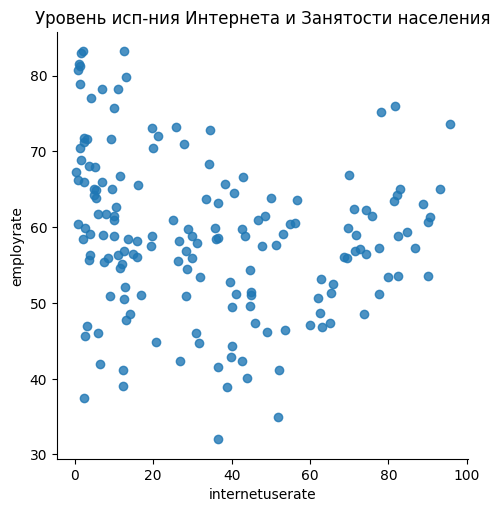

In [8]:
sns.lmplot(x="internetuserate", y="employrate", data=df2, fit_reg=False)
plt.title("Уровень исп-ния Интернета и Занятости населения")
plt.show()

### Интересно выглядит взаимосвязь уровня `использования Интернета` и `Занятости населения`

График несколько напоминает __параболу__. Поисследуем именно эту пару

----

1)

**Нулевая гипотеза** – это гипотеза об отсутствии различий. В данном случае - об отсутсвии взаимосвязи между уровнем использования интернета и занятости населения.

Это то, что мы хотим опровергнуть. Обозначается как **Но**.

----


2) 

Статистическая значимость или **р-уровень значимости (p-level)** — основной результат проверки статистической гипотезы

Это **вероятность получения данного результата** выборочного исследования **при условии, что на самом деле для генеральной совокупности верна нулевая статистическая гипотеза — то есть связи нет**

Установим уровень стат значимости в **5%**


Чтобы выполнить **ANOVA**, нам нужно преобразовать данные

Здесь обе переменные `internetuserate` и `employrate` __количественные__, анализ ANOVA подходит для ситуаций, когда __одна переменная является категориальной, а другая – количественной__.

In [9]:
# функция для разбиения данных на 10 частей
def bin(dataframe, cols):
    for col in cols:
        new_col_name = "{}_bins".format(col)
        dataframe[new_col_name] = pd.qcut(dataframe[col], 
                                          10, 
                                          labels=["1=10%", "2=20%", "3=30%", "4=40%", 
                                                  "5=50%", "6=60%", "7=70%", "8=80", 
                                                  "9=90%", "10=100%"])
        
# создаем копию даатсета и делаем все изменения в копии
df3 = df2.copy()

# применяем функцию разбиения данных на 10 частей
bin(df3, cols)
bin(df3, norm_cols)

In [10]:
# последние 6 столбцов - результат разбиения данных по блокам 
df3

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,...,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,lifeexpectancy_bins,breastcancerper100th_bins,suicideper100th_bins,internetuserate_bins,employrate_bins
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.654122,48.673,...,0,,6.684385,55.700001,24.04,1=10%,5=50%,4=40%,2=20%,4=40%
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.989947,76.918,...,9,636.341383366604,7.699330,51.400002,46.72,8=80,9=90%,5=50%,7=70%,3=30%
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.500073,73.131,...,2,590.509814347428,4.848770,50.500000,65.22,5=50%,4=40%,3=30%,4=40%,3=30%
3,Andorra,21943.3398976022,10.17,,NaN,,,,81.000000,NaN,...,,,5.362179,NaN,88.92,NaN,NaN,3=30%,10=100%,NaN
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.999954,51.093,...,-2,172.999227388199,14.554677,75.699997,56.7,1=10%,4=40%,9=90%,3=30%,10=100%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,Vietnam,722.807558834445,3.91,1.0853671,16.2,1425435000,67.5999984741211,.4,27.851822,75.181,...,-7,302.725654656034,11.653322,71.000000,27.84,7=70%,1=10%,7=70%,5=50%,9=90%
209,West Bank and Gaza,,,5.9360854,NaN,14241333.3333333,11.3000001907349,,36.422772,72.832,...,,,NaN,32.000000,71.9,5=50%,NaN,NaN,6=60%,1=10%
210,"Yemen, Rep.",610.3573673206,.2,2.3162346,35.1,234864666.666667,20.2999992370605,,12.349750,65.493,...,-2,130.05783139719,6.265789,39.000000,30.64,3=30%,7=70%,4=40%,4=40%,1=10%
211,Zambia,432.226336974583,3.56,.3413352,13.0,132025666.666667,53.5,13.5,10.124986,49.025,...,7,168.623030511023,12.019036,61.000000,35.42,1=10%,1=10%,8=80,3=30%,7=70%


После того как переменные были преобразованы и готовы к анализу, можно использовать библиотеку `statsmodel` для выполнения однофакторного __ANOVA__ по выбранным признакам. 

Шаблон для ANOVA: 

`ols("outcome_variable ~ C(independent_variable)", data= data_frame).fit()`

In [11]:
anova_df = df3[['employrate', 'internetuserate_bins']].dropna()

relate_df = df3[['employrate', 'internetuserate_bins']]

anova = smf.ols(formula='employrate ~ C(internetuserate_bins)', 
                data=anova_df).fit()

print(anova.summary())

                            OLS Regression Results                            
Dep. Variable:             employrate   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     4.250
Date:                Tue, 16 Sep 2025   Prob (F-statistic):           6.02e-05
Time:                        12:24:29   Log-Likelihood:                -610.57
No. Observations:                 167   AIC:                             1241.
Df Residuals:                     157   BIC:                             1272.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

 ----
 Если наш p-value меньше, чем **α (который равен 0.05)**, то мы отвергаем нулевую гипотезу **(а Hо была в том, что средние значения уровня безработицы в каждом бине (блоке по частоте использования интернета) равны между собой)** 
 
 Если нет - не отвергаем
 
 
 
 ----

Мы видим, что модель дает малое **P-значение ( Prob F-statistic ) 6.02e-05**. 

Это меньше обычного порога значимости 0.05.

Таким образом, мы приходим к выводу, что есть связь между уровнем безработицы и уровнем использования Интернета. Поскольку средние значения уровня безработицы в каждом бине (блоке по частоте использования интернета ) отличаются (поскольку мы **не приняли гипотезу Hо** об из равенстиве)

In [12]:
# Проверим средние и стандартные отклонения по группам
mean = relate_df.groupby("internetuserate_bins").mean()
sd = relate_df.groupby("internetuserate_bins").std()
print(mean)
print(sd)

                      employrate
internetuserate_bins            
1=10%                  67.540001
2=20%                  61.794117
3=30%                  61.074999
4=40%                  59.072222
5=50%                  56.682353
6=60%                  54.723530
7=70%                  53.750000
8=80                   51.712500
9=90%                  57.200000
10=100%                62.718750
                      employrate
internetuserate_bins            
1=10%                  13.051573
2=20%                   9.324126
3=30%                   9.335559
4=40%                  11.457944
5=50%                   9.326724
6=60%                  11.613114
7=70%                   7.577573
8=80                    8.398561
9=90%                   4.808465
10=100%                 7.228943


C:\Users\USER\AppData\Local\Temp\ipykernel_736\90811745.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean = relate_df.groupby("internetuserate_bins").mean()
C:\Users\USER\AppData\Local\Temp\ipykernel_736\90811745.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sd = relate_df.groupby("internetuserate_bins").std()


Если мы сравним исключительно средние значения __уровня занятости `employrate`__ внутри каждого бина по __уровню пользования интернетом__, то увидим следующую картинку:

- чем ниже уровень использования интернета, тем выше уровень занятости (это наблюдается в первыз 8 бинах)

- однако, есть аномальные значения в бинах на 90% и 100%, где уровень использования интернета и уровень занятости высокий. Спекулируя фактами, это можно объяснить работой в интернете

In [13]:
df = pd.read_csv("gapminder.csv") 
df.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7


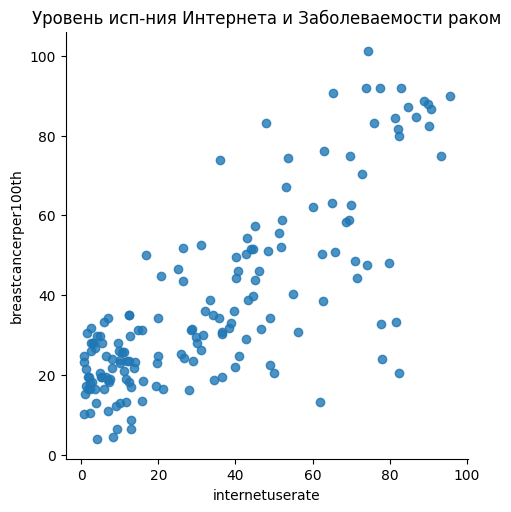

In [15]:
sns.lmplot(x="internetuserate", y="breastcancerper100th", data=df2, fit_reg=False)
plt.title("Уровень исп-ния Интернета и Заболеваемости раком")
plt.show()

In [16]:
df3


,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,...,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,lifeexpectancy_bins,breastcancerper100th_bins,suicideper100th_bins,internetuserate_bins,employrate_bins
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.654122,48.673,...,0,,6.684385,55.700001,24.04,1=10%,5=50%,4=40%,2=20%,4=40%
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.989947,76.918,...,9,636.341383366604,7.699330,51.400002,46.72,8=80,9=90%,5=50%,7=70%,3=30%
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.500073,73.131,...,2,590.509814347428,4.848770,50.500000,65.22,5=50%,4=40%,3=30%,4=40%,3=30%
3,Andorra,21943.3398976022,10.17,,NaN,,,,81.000000,NaN,...,,,5.362179,NaN,88.92,NaN,NaN,3=30%,10=100%,NaN
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.999954,51.093,...,-2,172.999227388199,14.554677,75.699997,56.7,1=10%,4=40%,9=90%,3=30%,10=100%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,Vietnam,722.807558834445,3.91,1.0853671,16.2,1425435000,67.5999984741211,.4,27.851822,75.181,...,-7,302.725654656034,11.653322,71.000000,27.84,7=70%,1=10%,7=70%,5=50%,9=90%
209,West Bank and Gaza,,,5.9360854,NaN,14241333.3333333,11.3000001907349,,36.422772,72.832,...,,,NaN,32.000000,71.9,5=50%,NaN,NaN,6=60%,1=10%
210,"Yemen, Rep.",610.3573673206,.2,2.3162346,35.1,234864666.666667,20.2999992370605,,12.349750,65.493,...,-2,130.05783139719,6.265789,39.000000,30.64,3=30%,7=70%,4=40%,4=40%,1=10%
211,Zambia,432.226336974583,3.56,.3413352,13.0,132025666.666667,53.5,13.5,10.124986,49.025,...,7,168.623030511023,12.019036,61.000000,35.42,1=10%,1=10%,8=80,3=30%,7=70%


In [17]:
anova_df = df3[['breastcancerper100th', 'internetuserate_bins']].dropna()

relate_df = df3[['breastcancerper100th', 'internetuserate_bins']]

anova = smf.ols(formula='breastcancerper100th ~ C(internetuserate_bins)', 
                data=anova_df).fit()

print(anova.summary())

                             OLS Regression Results                             
Dep. Variable:     breastcancerper100th   R-squared:                       0.617
Model:                              OLS   Adj. R-squared:                  0.595
Method:                   Least Squares   F-statistic:                     27.90
Date:                  Tue, 16 Sep 2025   Prob (F-statistic):           2.43e-28
Time:                          12:39:30   Log-Likelihood:                -675.44
No. Observations:                   166   AIC:                             1371.
Df Residuals:                       156   BIC:                             1402.
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------